# Filtering

In [1]:
import numpy as np
import scipy
from scipy import signal
import matplotlib.pyplot as plt

## Obtain low-pass filter coefficients for a difference equation (DE)

In [2]:
# Second-order Butterworth filter, LOWpass with cutoff frequency 1/4
b,a = signal.butter(2, 1/4, 'low') 
print("a = ", a)
print("b = ", b)

a =  [ 1.         -0.94280904  0.33333333]
b =  [0.09763107 0.19526215 0.09763107]


### Z-plane zero-pole plot of the filter $H(z) = B(z) / A(z)$

In [3]:
def zplane(b, a):
    # First, retrieve the poles and zeros 
    # They are roots of B(z) and A(z)
    z = np.roots(b)
    p = np.roots(a)

    # Plot the unit circle 
    circle = plt.Circle((0,0),1,linestyle='--',fill=False)
    fig,ax = plt.subplots(figsize=(8,8))

    ax.add_artist(circle)
    plt.grid(axis='both',which='both')
    plt.xlim((-1.5,1.5))
    plt.ylim((-1.5,1.5))

    # Plot zeros
    plt.plot(np.real(z),np.imag(z),'o',markersize=12,fillstyle='none')
    plt.plot(np.real(p),np.imag(p),'x',markersize=12)
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title('Zero-pole plot')

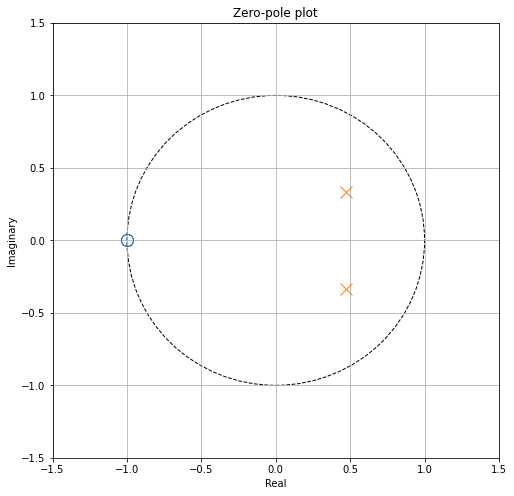

In [4]:
zplane(b, a)

### Impulse response $h[n]$ of the filter $H(z) = B(z) / A(z)$

In [5]:
def impz(b,a,N=50):
    n = np.arange(N)
    delta = np.zeros(N)
    delta[0] = 1
    h = signal.lfilter(b,a,delta)  # Passing impulse through the filter
    
    plt.figure(figsize=(10,6))
    plt.stem(n,h)
    plt.title('Impulse response')
    plt.xlabel('n')
    plt.ylabel('h[n]')

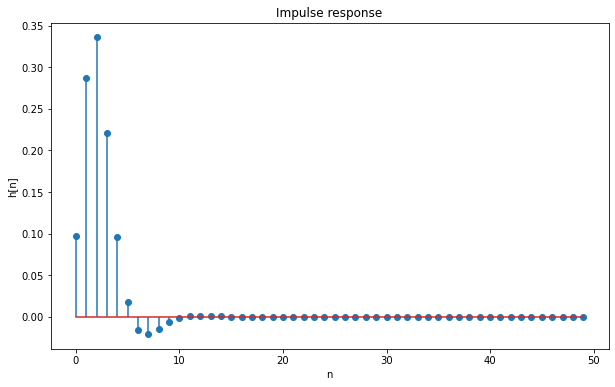

In [6]:
impz(b, a, 50)

### Frequency response $H_d(\omega)$ of the transfer function $H(z) = B(z) / A(z)$
This function is provided for readibility. In practice, use function scipy.signal.freqz

In [7]:
def freqresp(b, a, w, plot=True):
    z = np.exp(1j * w)   # z is on the unit circle
    
    Bw = np.zeros_like(w, dtype=complex)
    for k in range(len(b)):
        Bw = Bw + b[k] * (z ** (-k))
        
        
    Aw = np.zeros_like(w, dtype=complex)
    for k in range(len(a)):
        Aw = Aw + a[k] * (z ** (-k))
        
    Hw = Bw / Aw
    
    if plot:
        plt.figure(figsize=(10,6))
        plt.subplot(1,2,1)
        plt.plot(w/np.pi, np.absolute(Hw))
        plt.title(r'$|H_d(\omega)|$')
        plt.xlabel(r'$\omega/\pi$')
    
        plt.subplot(1,2,2)
        plt.plot(w/np.pi, np.angle(Hw))
        plt.title(r'$\angle H_d(\omega)$')
        plt.xlabel(r'$\omega/\pi$')
    
    return Hw

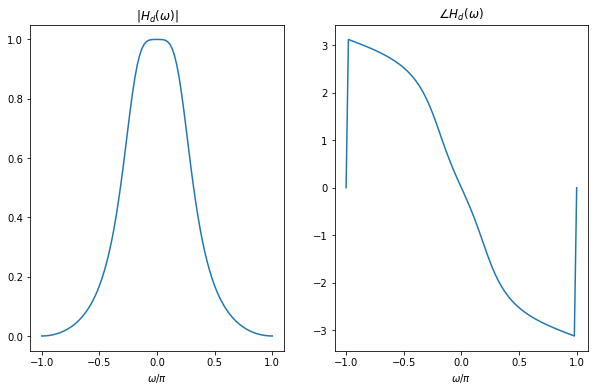

In [8]:
w = np.linspace(-np.pi, np.pi, 100)   # $\omega$ between -pi to +pi
Hw = freqresp(b, a, w)

## Apply a test signal

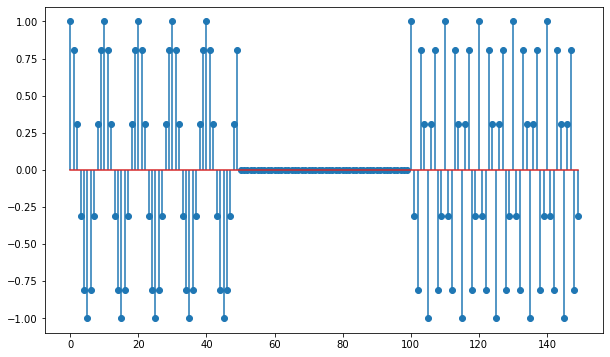

In [9]:
# Construct a signal with 2 frequencies
w1 = 0.2*np.pi
w2 = 0.6*np.pi
N = 50
n = np.arange(N)
x1 = np.cos(w1*n)
x2 = np.cos(w2*n)
x = np.concatenate((x1, np.zeros(N), x2))
plt.figure(figsize=(10,6))
plt.stem(x)
plt.show()

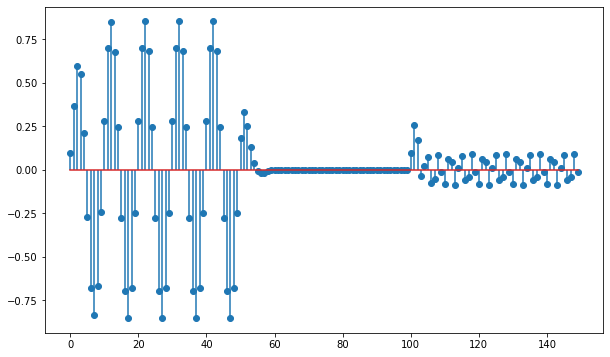

In [10]:
y = signal.lfilter(b, a, x)
plt.figure(figsize=(10,6))
plt.stem(y)
plt.show()

In [11]:
H1 = freqresp(b, a, w1, plot=False)
H2 = freqresp(b, a, w2, plot=False)
print('Amplify1 =', np.absolute(H1))
print('Amplify2 =', np.absolute(H2))
print('Shift1 =', np.angle(H1)/w1)
print('Shift2 =', np.angle(H2)/w2)

Amplify1 = 0.8516815779008028
Amplify2 = 0.09019798701751193
Shift1 = -1.9687638568850878
Shift2 = -1.4344557709673014


## Load a real signal

In [12]:
from scipy.io.wavfile import read
from IPython.display import Audio
fs, x = read('handel.wav')

### Apply the DE specified by $b$ and $a$ to an input signal $x$ to get $y$

In [13]:
y = signal.lfilter(b, a, x)

## Check the filtering effect in the DTFT
This function is provided for readibility. In the future, we will use the DFT/FFT function numpy.fft

In [14]:
def DTFT(x, n0, w):
    '''
    DTFT    Compute the Discrete-Time Fourier Transform of a signal
        Input:
          x  : discrete-time signal in an array
          n0 : index of the signal corresponding to the sample x[0]
          w  : array of frequencies that we want to compute DTFT
               for example: w = np.linspace(-pi,pi,100)
        Output:
          X  : DTFT coefficients at the specified frequencies w
    '''
    X = np.zeros_like(w,dtype=complex) # data types: important in Python!!
    # For each frequency in w
    for k in range(len(w)):
        # Compute the DTFT sum over signal samples
        X[k] = 0
        for n in range(len(x)):
            X[k] = X[k] + x[n] * np.exp(-1j * w[k] * (n + n0))
            
    return X

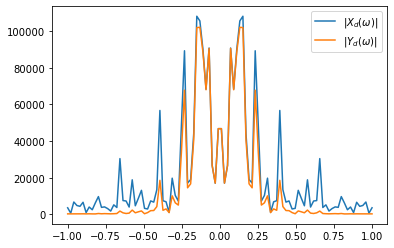

In [15]:
X = DTFT(x[0:200], 0, w) # Compute the DTFT of a 100-sample segnment of x
Y = DTFT(y[0:200], 0, w) # Compute the DTFT of a 100-sample segnment of y

fig, ax = plt.subplots()
ax.plot(w/np.pi, np.absolute(X), label='$|X_d(\omega)|$')
ax.plot(w/np.pi, np.absolute(Y), label='$|Y_d(\omega)|$')
ax.legend()
plt.show()

## Try with a different filter

In [16]:
# Second-order Butterworth filter, HIGHpass with cutoff frequency 1/4
b2, a2 = signal.butter(2, 1/4, 'high')
print("a2 = ", a2)
print("b2 = ", b2)

a2 =  [ 1.         -0.94280904  0.33333333]
b2 =  [ 0.56903559 -1.13807119  0.56903559]


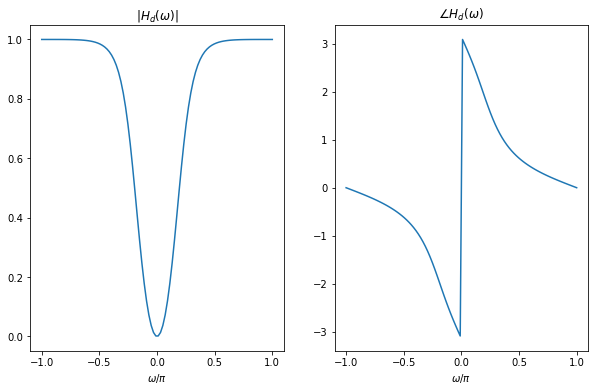

In [17]:
H2w = freqresp(b2, a2, w)

In [18]:
y2 = signal.lfilter(b2, a2, x)

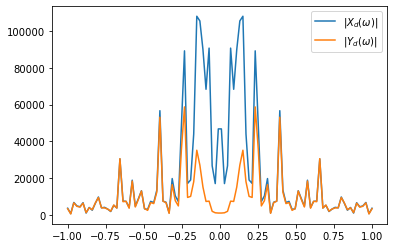

In [19]:
Y2 = DTFT(y2[0:200], 0, w) # Compute the DTFT of a 100-sample segnment of y2

fig, ax = plt.subplots()
ax.plot(w/np.pi, np.absolute(X), label='$|X_d(\omega)|$')
ax.plot(w/np.pi, np.absolute(Y2), label='$|Y_d(\omega)|$')
ax.legend()
plt.show()

## Compare sounds

In [20]:
Audio(data=x, rate=fs)

In [21]:
Audio(data=y, rate=fs)

In [22]:
Audio(data=y2, rate=fs)